# Notebook for exploring the data from DX

Used for initial exploration of the data to get a feel of the general structure

In [13]:
import math
import pandas as pd

In [2]:
pd.read_json('K:/team/dxcn.master_uis/data/320.json', encoding='utf-8')

,Std_filmnr,Titttel,arr_nr,ClaDate (xforest.Dato),ClaTime (xforest.Kl),solgt,Sal,Plasser,plasser,dekning
0,BVI20190484,Frost 2,3,2020-01-18T23:00:00.000Z,18:00:00,81,1,214,212,0.378505
1,NOR20190353,Tunnelen,4,2020-01-18T23:00:00.000Z,20:15:00,73,1,214,212,0.341121


In [3]:
b = pd.read_json('K:/team/dxcn.master_uis/data/178.json', encoding='utf-8')
b.set_index('arr_nr', inplace=True)

In [4]:
b.columns = pd.Index([
    'std_movienr',
    'title',
    'date',
    'showtime',
    'sold',
    'room',
    'seats',
    'seats_b',
    'coverage'
])

In [5]:
b.loc[:, b.showtime.name] = b.date.str[:10] + ' ' + b.showtime.str[:]
b.drop(columns=['date'], inplace=True)
b.showtime = pd.to_datetime(b.showtime, format='%Y-%m-%d %H:%M:%S')

In [6]:
b.tail()

,std_movienr,title,showtime,sold,room,seats,seats_b,coverage
arr_nr,,,,,,,,
63005,ART20040912,SINGIN' IN THE RAIN,2016-09-09 21:30:00,110,49,0,NaN,NaN
73504,ART20020337,TROLLMANNEN FRA OZ,2017-09-15 20:30:00,140,49,0,NaN,NaN
63004,SFN20070486,LANGE FLATE BALLÆR 2,2016-09-08 21:30:00,170,49,0,NaN,NaN
73503,SFN20051006,LANGE FLATE BALLÆR,2017-09-14 21:30:00,200,49,0,NaN,NaN
61111,UIP20151178,WAR ROOM,2016-07-15 22:30:00,138,81,0,NaN,NaN


In [7]:
b.sort_values('showtime').title.tolist()[:10]

['SOLAN OG LUDVIG - HERFRA TIL FLÅKLYPA',
 'STAR WARS 3D: THE FORCE AWAKENS',
 'JULEKONGEN - FULL RUSTNING',
 'DOKTOR PROKTORS TIDSBADEKAR',
 'JAMES BOND: SPECTRE',
 'SOLAN OG LUDVIG - HERFRA TIL FLÅKLYPA',
 'STAR WARS 2D: THE FORCE AWAKENS',
 'SNOOPY OG CHARLIE BROWN: KNØTTENE-FILMEN (2D, NORSK TALE)',
 'THE HUNGER GAMES 2D: MOCKINGJAY PART 2',
 'STAR WARS 3D: THE FORCE AWAKENS']

In [8]:
b.sort_values(by='showtime', inplace=True)

In [9]:
b.head()

,std_movienr,title,showtime,sold,room,seats,seats_b,coverage
arr_nr,,,,,,,,
56036,NOR20140585,SOLAN OG LUDVIG - HERFRA TIL FLÅKLYPA,2015-12-31 12:00:00,11,2,335,335.0,0.032836
56038,BVI20141301,STAR WARS 3D: THE FORCE AWAKENS,2015-12-31 12:15:00,11,5,112,110.0,0.098214
56040,NOR20141297,JULEKONGEN - FULL RUSTNING,2015-12-31 12:30:00,24,4,117,115.0,0.205128
56212,NOR20140583,DOKTOR PROKTORS TIDSBADEKAR,2015-12-31 12:45:00,19,6,50,48.0,0.380000
56207,SFN20150017,JAMES BOND: SPECTRE,2015-12-31 13:15:00,14,1,70,70.0,0.200000


In [11]:
early_showings  = b.loc[b.showtime.dt.strftime('%H:%M:%S').between('08:00:00','13:00:00')]
middle_showings = b.loc[b.showtime.dt.strftime('%H:%M:%S').between('13:00:01','18:00:00')]
late_showings   = b.loc[b.showtime.dt.strftime('%H:%M:%S').between('18:00:01','23:59:59')]

In [12]:
years = [str(year) for year in range(2006, 2021)]

In [14]:
for year in years:
    early_cove = round(early_showings.loc[early_showings.showtime.dt.strftime('%Y').between(year, year), 'coverage'].mean(), 3)
    early_sold = round(early_showings.loc[early_showings.showtime.dt.strftime('%Y').between(year, year), 'sold'].mean(), 3)
    early_size = round(early_showings.loc[early_showings.showtime.dt.strftime('%Y').between(year, year), 'seats'].mean(), 3)
    if math.isnan(early_cove): early_cove = 0
    if math.isnan(early_sold): early_sold = 0
    if math.isnan(early_size): early_size = 0
    
    middle_cove = round(middle_showings.loc[middle_showings.showtime.dt.strftime('%Y').between(year, year), 'coverage'].mean(), 3)
    middle_sold = round(middle_showings.loc[middle_showings.showtime.dt.strftime('%Y').between(year, year), 'sold'].mean(), 3)
    middle_size = round(middle_showings.loc[middle_showings.showtime.dt.strftime('%Y').between(year, year), 'seats'].mean(), 3)
    if math.isnan(middle_cove): middle_cove = 0
    if math.isnan(middle_sold): middle_sold = 0
    if math.isnan(middle_size): middle_size = 0
        
    late_cove = round(late_showings.loc[late_showings.showtime.dt.strftime('%Y').between(year, year), 'coverage'].mean(), 3)
    late_sold = round(late_showings.loc[late_showings.showtime.dt.strftime('%Y').between(year, year), 'sold'].mean(), 3)
    late_size = round(late_showings.loc[late_showings.showtime.dt.strftime('%Y').between(year, year), 'seats'].mean(), 3)
    if math.isnan(late_cove): late_cove = 0
    if math.isnan(late_sold): late_sold = 0
    if math.isnan(late_size): late_size = 0
    
    print('{} \t\t\tAVG coverage \tAVG tickets sold \tAVG room size \tNumber of showings'.format(year))
    print('Early showings: \t{} \t\t{} \t\t\t{} \t\t{}'.format(
        early_cove,
        int(early_sold),
        int(early_size),
        early_showings.loc[early_showings.showtime.dt.strftime('%Y').between(year, year)].shape[0]
    ))
    print('Middle showings: \t{} \t\t{} \t\t\t{} \t\t{}'.format(
        middle_cove,
        int(middle_sold),
        int(middle_size),
        middle_showings.loc[middle_showings.showtime.dt.strftime('%Y').between(year, year)].shape[0]
    ))
    print('Late showings: \t\t{} \t\t{} \t\t\t{} \t\t{}'.format(
        late_cove,
        int(late_sold),
        int(late_size),
        late_showings.loc[late_showings.showtime.dt.strftime('%Y').between(year, year)].shape[0]
    ))
    print()

2006 			AVG coverage 	AVG tickets sold 	AVG room size 	Number of showings
Early showings: 	0 		0 			0 		0
Middle showings: 	0 		0 			0 		0
Late showings: 		0 		0 			0 		0

2007 			AVG coverage 	AVG tickets sold 	AVG room size 	Number of showings
Early showings: 	0 		0 			0 		0
Middle showings: 	0 		0 			0 		0
Late showings: 		0 		0 			0 		0

2008 			AVG coverage 	AVG tickets sold 	AVG room size 	Number of showings
Early showings: 	0 		0 			0 		0
Middle showings: 	0 		0 			0 		0
Late showings: 		0 		0 			0 		0

2009 			AVG coverage 	AVG tickets sold 	AVG room size 	Number of showings
Early showings: 	0 		0 			0 		0
Middle showings: 	0 		0 			0 		0
Late showings: 		0 		0 			0 		0

2010 			AVG coverage 	AVG tickets sold 	AVG room size 	Number of showings
Early showings: 	0 		0 			0 		0
Middle showings: 	0 		0 			0 		0
Late showings: 		0 		0 			0 		0

2011 			AVG coverage 	AVG tickets sold 	AVG room size 	Number of showings
Early showings: 	0 		0 			0 		0
Middle showings: 	0 		0 			0 		0
L

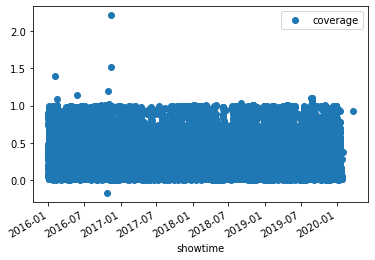

In [15]:
b.plot(y='coverage', x='showtime', style='o')

In [16]:
late_showings.coverage.mean(), early_showings.coverage.mean()

(0.2683899206043562, 0.2053217423451962)

In [17]:
b.title.str.lower().unique()

array(['solan og ludvig - herfra til flåklypa',
       'star wars 3d: the force awakens', 'julekongen - full rustning',
       ..., '1917 (2d, atmos, norsk tekst)', 'little women',
       'richard says goodbye'], dtype=object)